# hyper parameter

## 하이퍼파라미터 튜닝을 위한 방법

- GridSearchCV(그리드 탐색)
- RandomizedSearchCV(랜덤 탐색)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [4]:
cal_house_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
cal_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
cal_house_df['Price($)'] = dataset.target * 100000
cal_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price($)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [6]:
from sklearn.model_selection import train_test_split

X = cal_house_df.drop('Price($)', axis = 1)
y = cal_house_df['Price($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, shuffle = True)

In [7]:
from lightgbm import LGBMRegressor

# LGBM 모델 학습

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 예측 결과 확인

predictions = lgbm_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 32727.04
MSE: 2422494588.9
RMSE: 49218.84
R2: 0.85
adj_R2: 0.84


# GridSearchCV

- 사전에 지정된 하이퍼파라미터 값들을 그리드 형식으로 모두 탐색하면서 최적 성능 조합을 탐색함

```python
GridSearchCV(모델명, 하이퍼파라미터 그리드(dict), cv = 성능 비교할 분할 데이터 수, scoring = 평가 방법)
```

### 핵심 파라미터

- learning_rate: 학습률(틀린 값에 대한 가중치를 얼마나 줄 것인지)
- num_leaves: 전체 나무의 잎 수
- min_child_samples: 나뭇잎에 계산되는 최소 데이터 수
- n_estimators: 부스팅(학습 반복)횟수

In [9]:
# 하이퍼 파라미터 목록

lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [10]:
# 튜닝할 하이퍼 파라미터 목록 생성

param_grid = {'learning_rate': [0.05, 0.1],
             'num_leaves': [31, 50],
             'min_child_samples': [50],
             'n_estimators': [100, 300]}

In [11]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(lgbm_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1],
                         'min_child_samples': [50], 'n_estimators': [100, 300],
                         'num_leaves': [31, 5

In [12]:
# 최적 하이퍼파라미터 확인

grid_search.best_params_

{'learning_rate': 0.1,
 'min_child_samples': 50,
 'n_estimators': 300,
 'num_leaves': 50}

In [13]:
# 최적 파라미터로 성능 확인

lgbm_model_gridCV = LGBMRegressor(learning_rate = 0.1, min_child_samples = 50, n_estimators = 300, num_leaves = 50)
lgbm_model_gridCV.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=50, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
# 예측 결과 확인

predictions = lgbm_model_gridCV.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 28422.2
MSE: 2034903382.24
RMSE: 45109.9
R2: 0.87
adj_R2: 0.87


# RandomizedSearchCV

- GridSearchCV방식은 적은 수의 조합을 탐색할 때 적합. 수가 많아지면 시간이 오래걸림
- RandomizedSearchCV는 지정된 횟수만큼 탐색을 실행하기 때문에 연산량을 조절할 수 있음

```python
RandomizedSearchCV(모델명, 하이퍼파라미터 범위(dict), n_iter = 탐색 횟수, cv = 성능 비교할 분할 데이터 수, scoring = 평가 방법)
```

In [16]:
# 튜닝할 하이퍼 파라미터 목록 생성

param_range = {'learning_rate': [0.05, 0.1],
              'num_leaves': [31, 50],
              'min_child_samples': [50],
              'n_estimators': [100, 300]}

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
random_search = RandomizedSearchCV(lgbm_model, param_range, n_iter = 5, cv = 5, scoring = 'neg_mean_squared_error')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, subsample=1.0,
                                           subsample_for_bin=200000,
                                           subsa

In [19]:
# 최적 파라미터 확인

random_search.best_params_

{'num_leaves': 50,
 'n_estimators': 300,
 'min_child_samples': 50,
 'learning_rate': 0.1}

In [20]:
# 최적 파라미터로 성능 확인

lgbm_model_randomCV = LGBMRegressor(learning_rate = 0.1, min_child_samples = 50, n_estimators = 300, num_leaves = 50)
lgbm_model_randomCV.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=50, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
# 예측 결과 확인

predictions = lgbm_model_randomCV.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {} '.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 28422.2
MSE: 2034903382.24
RMSE: 45109.9 
R2: 0.87
adj_R2: 0.87


# 하이퍼 파라미터 튜닝 결과 비교

In [22]:
# 모델별 성능 비교

mae, mse, rmse, r2, adj_r2 = [], [], [], [], []

for model in [lgbm_model, lgbm_model_gridCV, lgbm_model_randomCV]:
    predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, predictions))
    mse.append(mean_squared_error(y_test, predictions))
    rmse.append(mse[-1] ** 0.5)
    r2.append(r2_score(y_test, predictions))
    adj_r2.append(1 - (1 - r2[-1]) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    
perf_df = pd.DataFrame({'model': ['Default', 'GridSearchCV', 'RandomSearchCV'],
                       'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'adj_R2': adj_r2})
perf_df

,model,MAE,MSE,RMSE,R2,adj_R2
0,Default,32727.035923,2.422495e+09,49218.843840,0.848202,0.842069
1,GridSearchCV,28422.197619,2.034903e+09,45109.903372,0.872489,0.867337
2,RandomSearchCV,28422.197619,2.034903e+09,45109.903372,0.872489,0.867337


- MAE, MSE, RMSE: 낮을수록 좋음
    - 디폴트로 하이퍼파라미터를 설정했을 때보다 하이퍼파라미터를 튜닝했을 때 더 성능이 좋음
- R2: 높을수록 좋음
    - 디폴트보다 하이퍼파라미터를 튜닝했을 때 더 성능이 좋음

Text(0.5, 1.0, 'R2')

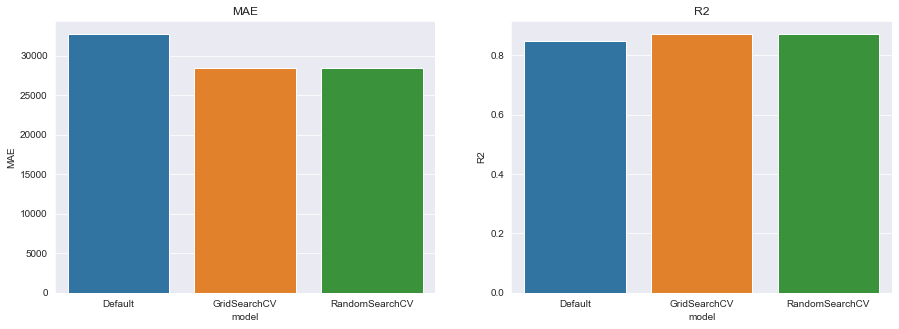

In [23]:
# 하이퍼 파라미터 튜닝 모델 성능 시각화

sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# MAE

sns.barplot(data = perf_df, x = 'model', y = 'MAE', ax = axes[0])
axes[0].set_title('MAE')

# R2

sns.barplot(data = perf_df, x = 'model', y = 'R2', ax = axes[1])
axes[1].set_title('R2')